<a href="https://colab.research.google.com/github/RFankhauser/MSc_WI_BINA/blob/main/MSc_WI_BINA_Erstes_Projekt_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import glob

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
file_path = "/content/drive/MyDrive/Coffee_Shop_Sales.xlsx"

df_raw = pd.read_excel(file_path, index_col=0)
display(df_raw.head(10))

,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
transaction_id,,,,,,,,,,
1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
6,2023-01-01,07:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone
7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
8,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm
9,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg


In [4]:
#print(df["transaction_date"].dtype)
#df['transaction_date'] = df['transaction_date'].dt.strftime('%d.%m.%Y')
#display(df.head(1))


Zusammenführung Datum + Zeit

In [5]:
df = df_raw.copy()
df['transaction_time'] = df['transaction_time'].astype(str)
df['transaction_time'] = pd.to_timedelta(df['transaction_time'])
df["transaction_date"] = df["transaction_date"] + df["transaction_time"]
df.drop('transaction_time', axis=1, inplace=True)


#display(df.head(1))


Hinzufügen neue Spalte (Total) + Berechnen pron Spalte

In [6]:
df["total_price"] = df["transaction_qty"] * df["unit_price"]
#display(df.head(10))

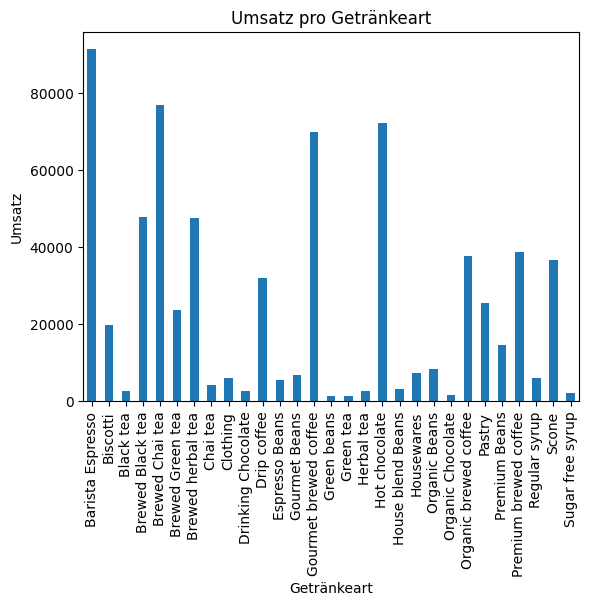

In [7]:
grouped_data = df.groupby('product_type')['total_price'].sum()

grouped_data.plot(kind='bar')
plt.xlabel('Getränkeart')
plt.ylabel('Umsatz')
plt.title('Umsatz pro Getränkeart')
plt.show()


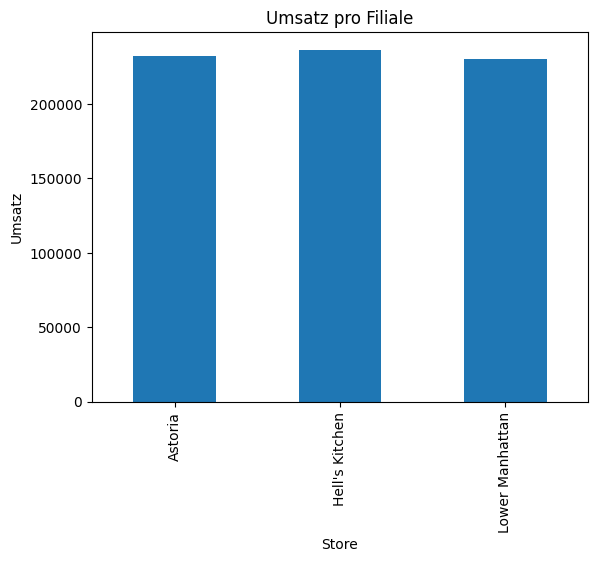

In [8]:
grouped_data = df.groupby('store_location')['total_price'].sum()

grouped_data.plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Umsatz')
plt.title('Umsatz pro Filiale')
plt.show()